In [1]:
import pandas as pd
import yfinance as yf
import os
from dotenv import load_dotenv
import fredapi
from fredapi import Fred
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

In [3]:
# Pull unemployment data
unemployment_rate = fred.get_series('UNRATE', observation_start='1990-01-01')
unemployment_rate = unemployment_rate.dropna()
unemployment_rate

1990-01-01    5.4
1990-02-01    5.3
1990-03-01    5.2
1990-04-01    5.4
1990-05-01    5.4
             ... 
2020-12-01    6.7
2021-01-01    6.3
2021-02-01    6.2
2021-03-01    6.0
2021-04-01    6.1
Length: 376, dtype: float64

<AxesSubplot:title={'center':'US Unemployment Rate'}, xlabel='Date', ylabel='unemployment (%)'>

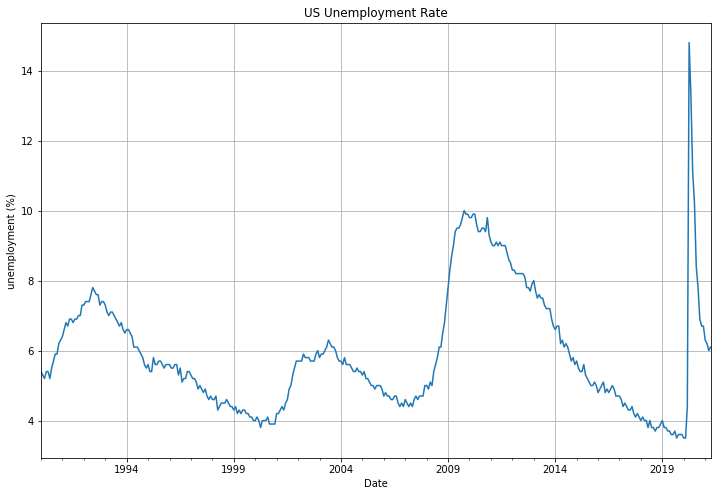

In [4]:
# Plot unemployment data
unemployment_rate.plot(figsize=(12,8), title='US Unemployment Rate', grid=True, xlabel='Date', ylabel='unemployment (%)')

In [5]:
# Pull S&P 500 historical data; set freq to monthly
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2021-05-25"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='M').ffill().dropna()
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-31,322.980011,329.079987,322.980011,329.079987,329.079987,189660000.0
1990-02-28,330.260010,333.480011,330.160004,331.890015,331.890015,184400000.0
1990-03-31,330.260010,333.480011,330.160004,331.890015,331.890015,184400000.0
1990-04-30,329.109985,331.309998,327.760010,330.799988,330.799988,122750000.0
1990-05-31,360.859985,361.839996,360.230011,361.230011,361.230011,165690000.0


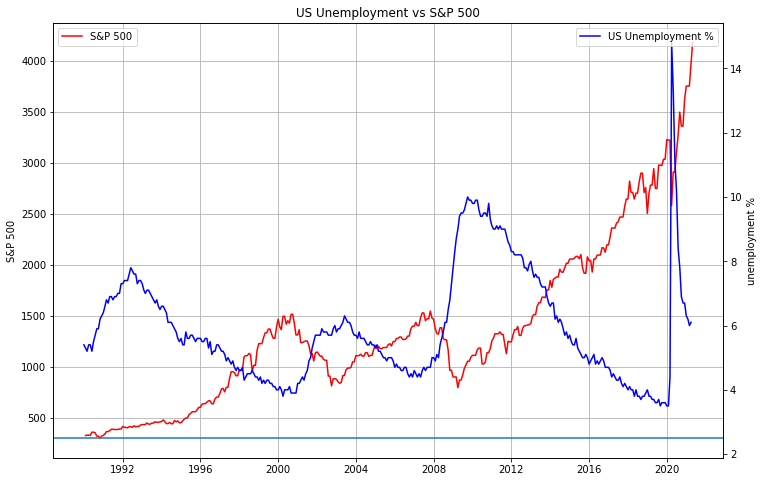

In [6]:
#Plot US unemployment against S&P 500 index
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(unemployment_rate, label='US Unemployment %', color='b')
ax.set_title('US Unemployment vs S&P 500')
ax2.set_ylabel('unemployment %')
ax2.axhline(y=2.5)
ax2.legend(loc='upper right')